# SALMON - Paper Results

This notebook contains all of the code used to generate the results seen in the paper.

Code used in the paper will be displayed here in corresponding sections.

Toggle `DATAFRAME_AS_LATEX` to showcase resulting `DataFrame` objects as LaTeX or as a native notebook rendering.

Toggle `SAVE_PLOTS` to enable/disable overwriting renderings in `./paper_plots`.

In [1]:
%matplotlib inline

DATAFRAME_AS_LATEX = True  
SAVE_PLOTS = True

def print_dataframe(df, name):
    if "." not in name:
        name += ".tex"
    name = "./tables/" + name
    if DATAFRAME_AS_LATEX:
        latex_output = df.to_latex()
        print(latex_output)
        with open(name, "w") as f:
            f.write(latex_output)
    else:
        print(df)
        
def handle_plot(fig, name, **kwargs):
    if SAVE_PLOTS:
        if "." not in name:
            name += ".png"
        name = "./plots/" + name
        fig.savefig(name, dpi=150, bbox_inches="tight", **kwargs)
    return

## Section 1.

_no SALMON specific code used_

## Section 2.

In [2]:
from salmon import *
import pandas as pd

# shuffle for a good representative 'head' to showcase dataset
full_data = pd.read_csv("AmesHousing.csv").sample(frac=1, random_state=12312).reset_index(drop=True)  
full_data = full_data.drop([2438, 1989, 1134, 2775]).reset_index(drop=True)
full_data = full_data.drop([442, 1671]).reset_index(drop=True) # Dropping some extreme outliers

In [3]:
data = full_data[["SalePrice"]].copy()
data["Style"] =  full_data["House Style"].apply(lambda x: x.replace("Story", " Story") if x in set(["1Story", "2Story",]) else "Other")
data["SqFt"] = full_data["Gr Liv Area"]
data["Fire"] = full_data["Fireplace Qu"].apply(lambda x: "No" if pd.isna(x) else "Yes")
print_dataframe(data.head(), "data_head")

\begin{tabular}{lrlrl}
\toprule
{} &  SalePrice &    Style &  SqFt & Fire \\
\midrule
0 &     162000 &  2 Story &  1400 &   No \\
1 &     195000 &  2 Story &  1660 &   No \\
2 &     164000 &    Other &  1646 &  Yes \\
3 &     417500 &  1 Story &  2464 &  Yes \\
4 &     186800 &  1 Story &  1400 &   No \\
\bottomrule
\end{tabular}



In [4]:
x = Q("SqFt")
y = Q("SalePrice")
simple_model = LinearModel(x, y)
print(simple_model)

SalePrice ~ 1+SqFt


In [5]:
no_intercept_model = LinearModel(x - 1, y) 
no_intercept_model = LinearModel(x, y, intercept=False)
print(no_intercept_model)

SalePrice ~ SqFt


In [6]:
print_dataframe(simple_model.fit(data), name="simple_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &    SE &     t &      p &  2.5\% CI &  97.5\% CI \\
\midrule
SqFt      &         118.5 & 2.068 & 57.33 &  0.000 &    114.5 &     122.6 \\
Intercept &          3614 &  3254 & 1.111 & 0.2668 &    -2766 &      9995 \\
\bottomrule
\end{tabular}



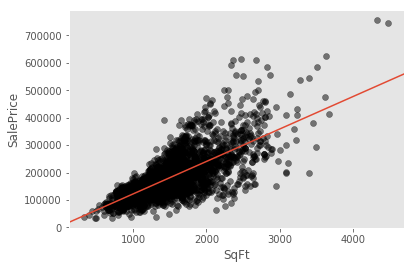

In [7]:
handle_plot(simple_model.plot(), name="simple_model_output")

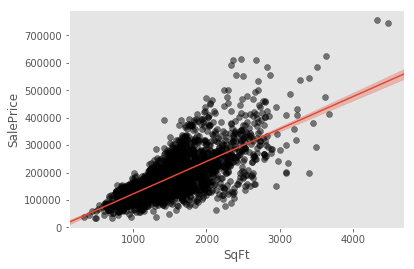

In [8]:
alpha_val = 0.05
handle_plot(simple_model.plot(confidence_band=alpha_val), name="simple_model_output_conf_band")

In [9]:
simple_log_model = LinearModel(Q("SqFt"), Log(Q("SalePrice")))
print(simple_log_model)

log(SalePrice) ~ 1+SqFt


In [10]:
print_dataframe(simple_log_model.fit(data), name="simple_log_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &       SE &     t &     p &  2.5\% CI &  97.5\% CI \\
\midrule
SqFt      &      5.906e-4 & 1.055e-5 & 55.96 & 0.000 & 5.699e-4 &  6.113e-4 \\
Intercept &         11.14 &   0.0166 & 670.6 & 0.000 &    11.11 &     11.17 \\
\bottomrule
\end{tabular}



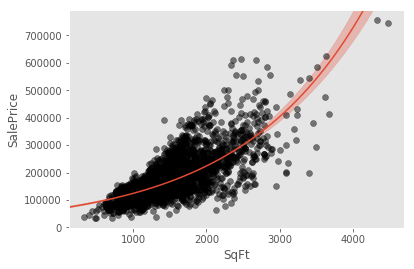

In [11]:
handle_plot(simple_log_model.plot(confidence_band=alpha_val), name="simple_log_model_output")

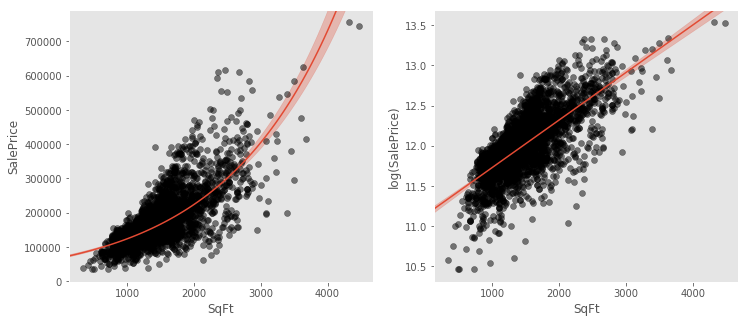

In [12]:
handle_plot(simple_log_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12, 5)), name="simple_log_model_both_outputs")

In [13]:
poly_model = LinearModel(Poly(Q("SqFt"), 2), Log(Q("SalePrice")))
# Poly(Q("SqFt"), 2) is equivalent to Q("SqFt") + Q("SqFt") ** 2
print(poly_model)

log(SalePrice) ~ 1+SqFt+SqFt^2


In [14]:
print_dataframe(poly_model.fit(data), name="poly_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &       SE &      t &       p &   2.5\% CI &  97.5\% CI \\
\midrule
SqFt\textasciicircum 2    &     -1.180e-7 & 1.296e-8 & -9.107 & 1.5e-19 & -1.434e-7 & -9.261e-8 \\
SqFt      &      9.989e-4 & 4.603e-5 &  21.70 & 5.9e-97 &  9.087e-4 &    0.0011 \\
Intercept &         10.82 &   0.0386 &  280.3 &   0.000 &     10.75 &     10.90 \\
\bottomrule
\end{tabular}



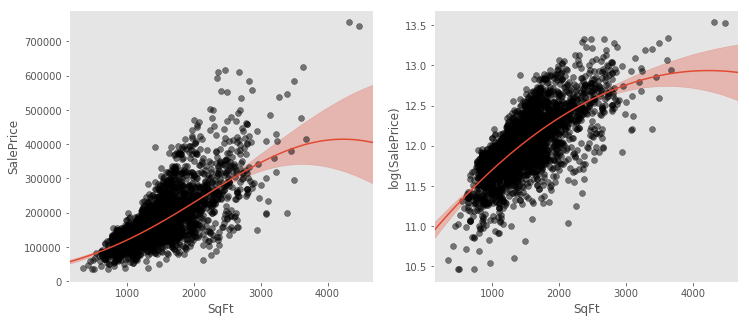

In [15]:
handle_plot(poly_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12, 5)), name="poly_model_outputs")

In [16]:
simple_cat_model = LinearModel(
    C("Style") + C("Fire"), 
    Log(Q("SalePrice")),
)
print(simple_cat_model)

log(SalePrice) ~ 1+Fire+Style


In [17]:
print_dataframe(simple_cat_model.fit(data), name="simple_cat_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &     SE &      t &       p &  2.5\% CI &  97.5\% CI \\
\midrule
Fire\{Yes\}      &        0.3966 & 0.0124 &  31.87 &  1e-191 &   0.3722 &    0.4210 \\
Style\{2 Story\} &        0.1058 & 0.0143 &  7.374 & 2.1e-13 &   0.0777 &    0.1339 \\
Style\{Other\}   &       -0.1500 & 0.0164 & -9.156 & 9.8e-20 &  -0.1821 &   -0.1179 \\
Intercept      &         11.82 & 0.0105 &   1124 &   0.000 &    11.80 &     11.84 \\
\bottomrule
\end{tabular}



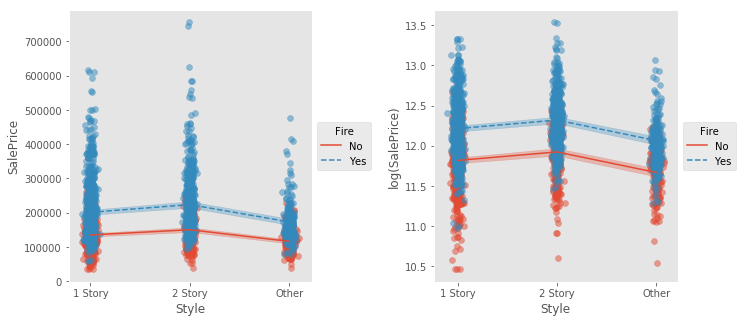

In [18]:
handle_plot(simple_cat_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12,5)), name="simple_cat_model_output")

In [19]:
house, fire = C("Style"), C("Fire")
interaction_model = LinearModel(
        house & fire, # or: house + fire + house * fire, 
        Log(Q("SalePrice")))
print(interaction_model)

log(SalePrice) ~ (Fire)(Style)+1+Fire+Style


In [20]:
print_dataframe(interaction_model.fit(data), name="interaction_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &     SE &       t &        p &  2.5\% CI &  97.5\% CI \\
\midrule
Fire\{Yes\}                   &        0.4347 & 0.0173 &   25.13 &   3e-126 &   0.4008 &    0.4687 \\
(Fire\{Yes\})(Style\{2 Story\}) &       -0.0190 & 0.0289 & -0.6593 &   0.5097 &  -0.0756 &    0.0376 \\
(Fire\{Yes\})(Style\{Other\})   &       -0.1638 & 0.0327 &  -5.008 & 5.813e-7 &  -0.2280 &   -0.0997 \\
Style\{2 Story\}              &        0.1123 & 0.0217 &   5.179 & 2.385e-7 &   0.0698 &    0.1548 \\
Style\{Other\}                &       -0.0740 & 0.0223 &  -3.318 & 9.181e-4 &  -0.1177 &   -0.0303 \\
Intercept                   &         11.80 & 0.0119 &   987.7 &    0.000 &    11.78 &     11.82 \\
\bottomrule
\end{tabular}



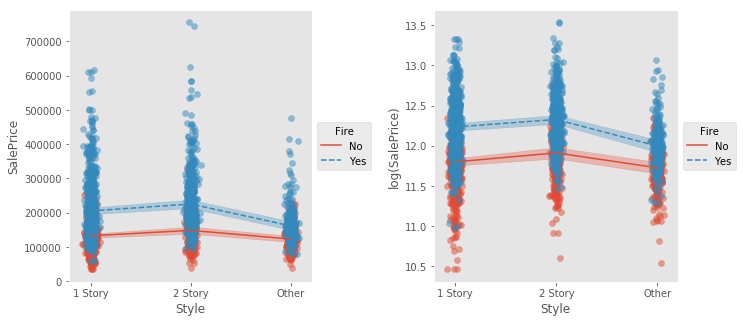

In [21]:
handle_plot(interaction_model.plot(confidence_band=alpha_val, transformed_y_space=True, figsize=(12,5)), name="interaction_model_output")

In [24]:
house, fire, sqft = C("Style"), C("Fire"), Q("SqFt")
quant_cat_model = LinearModel(
        (house & fire) + sqft, 
        Log(Q("SalePrice")))
print(quant_cat_model)

log(SalePrice) ~ (Fire)(Style)+1+Fire+SqFt+Style


In [24]:
print_dataframe(quant_cat_model.fit(data), name="quant_cat_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &       SE &      t &        p &  2.5\% CI &  97.5\% CI \\
\midrule
(Fire\{Yes\})(Style\{2 Story\}) &       -0.0389 &   0.0215 & -1.807 &   0.0709 &  -0.0811 &    0.0033 \\
(Fire\{Yes\})(Style\{Other\})   &       -0.1478 &   0.0244 & -6.057 & 1.564e-9 &  -0.1957 &   -0.1000 \\
Fire\{Yes\}                   &        0.2160 &   0.0137 &  15.79 &  5.7e-54 &   0.1892 &    0.2428 \\
SqFt                        &      5.732e-4 & 1.188e-5 &  48.24 &    0.000 & 5.499e-4 &  5.965e-4 \\
Style\{2 Story\}              &       -0.1524 &   0.0171 & -8.926 &  7.7e-19 &  -0.1859 &   -0.1189 \\
Style\{Other\}                &       -0.1535 &   0.0167 & -9.184 &  7.7e-20 &  -0.1863 &   -0.1207 \\
Intercept                   &         11.15 &   0.0161 &  691.6 &    0.000 &    11.12 &     11.18 \\
\bottomrule
\end{tabular}



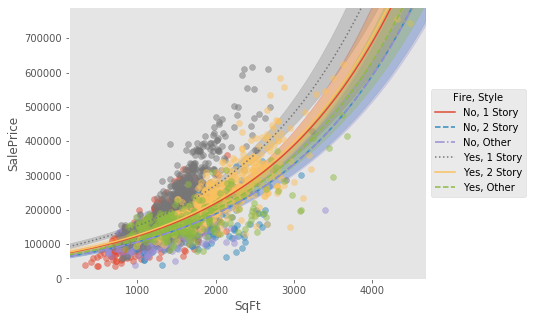

In [40]:
handle_plot(quant_cat_model.plot(confidence_band=alpha_val, figsize=(8,5)), name="quant_cat_model_output")

In [25]:
house, fire, sqft = C("Style"), C("Fire"), Q("SqFt")
full_model = LinearModel(
        house & fire & sqft,  # TODO: Look into error when it is sqft * cat_vars 
        Log(Q("SalePrice")))
print(full_model)

log(SalePrice) ~ (Fire)(SqFt)+(Fire)(SqFt)(Style)+(Fire)(Style)+(SqFt)(Style)+1+Fire+SqFt+Style


In [26]:
print_dataframe(full_model.fit(data), name="full_model_output")

\begin{tabular}{lrrrrrr}
\toprule
{} &  Coefficients &       SE &       t &        p &   2.5\% CI &  97.5\% CI \\
\midrule
(Fire\{Yes\})(Style\{2 Story\})(SqFt) &      6.001e-5 & 5.605e-5 &   1.071 &   0.2844 & -4.989e-5 &  1.699e-4 \\
(Fire\{Yes\})(Style\{Other\})(SqFt)   &      3.096e-5 & 6.166e-5 &  0.5021 &   0.6156 & -8.994e-5 &  1.519e-4 \\
(Style\{2 Story\})(SqFt)            &     -2.852e-4 & 4.556e-5 &  -6.260 &  4.4e-10 & -3.746e-4 & -1.959e-4 \\
(Style\{Other\})(SqFt)              &     -4.985e-4 & 4.912e-5 &  -10.15 &  8.4e-24 & -5.948e-4 & -4.022e-4 \\
(Fire\{Yes\})(SqFt)                 &      6.014e-5 & 3.821e-5 &   1.574 &   0.1156 & -1.478e-5 &  1.351e-4 \\
(Fire\{Yes\})(Style\{2 Story\})       &       -0.0766 &   0.0886 & -0.8640 &   0.3877 &   -0.2504 &    0.0972 \\
(Fire\{Yes\})(Style\{Other\})         &       -0.0236 &   0.0872 & -0.2713 &   0.7862 &   -0.1946 &    0.1473 \\
SqFt                              &      7.457e-4 & 2.922e-5 &   25.52 &   8e-130 &  6.884e-

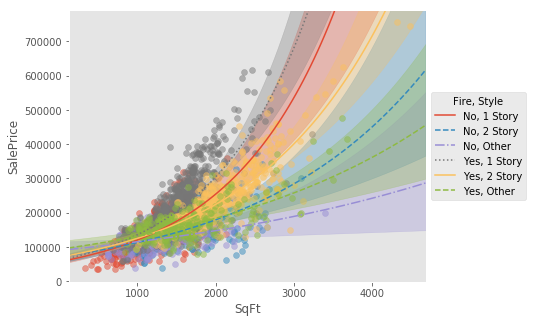

In [27]:
handle_plot(full_model.plot(confidence_band=alpha_val, figsize=(8,5)), name="full_model_output")

In [28]:
new_data = data.head()
print_dataframe(full_model.predict(new_data), name="full_model_predictions")

\begin{tabular}{lr}
\toprule
{} &  Predicted log(SalePrice) \\
\midrule
0 &                     11.82 \\
1 &                     11.94 \\
2 &                     12.00 \\
3 &                     13.00 \\
4 &                     12.00 \\
\bottomrule
\end{tabular}



In [29]:
print_dataframe(full_model.predict(new_data, prediction_interval=alpha_val), name="full_model_predictions_interval")

\begin{tabular}{lrrr}
\toprule
{} &  Predicted log(SalePrice) &  2.5\% &  97.5\% \\
\midrule
0 &                     11.82 & 11.36 &  12.29 \\
1 &                     11.94 & 11.48 &  12.41 \\
2 &                     12.00 & 11.54 &  12.47 \\
3 &                     13.00 & 12.53 &  13.47 \\
4 &                     12.00 & 11.53 &  12.46 \\
\bottomrule
\end{tabular}



## Section 3

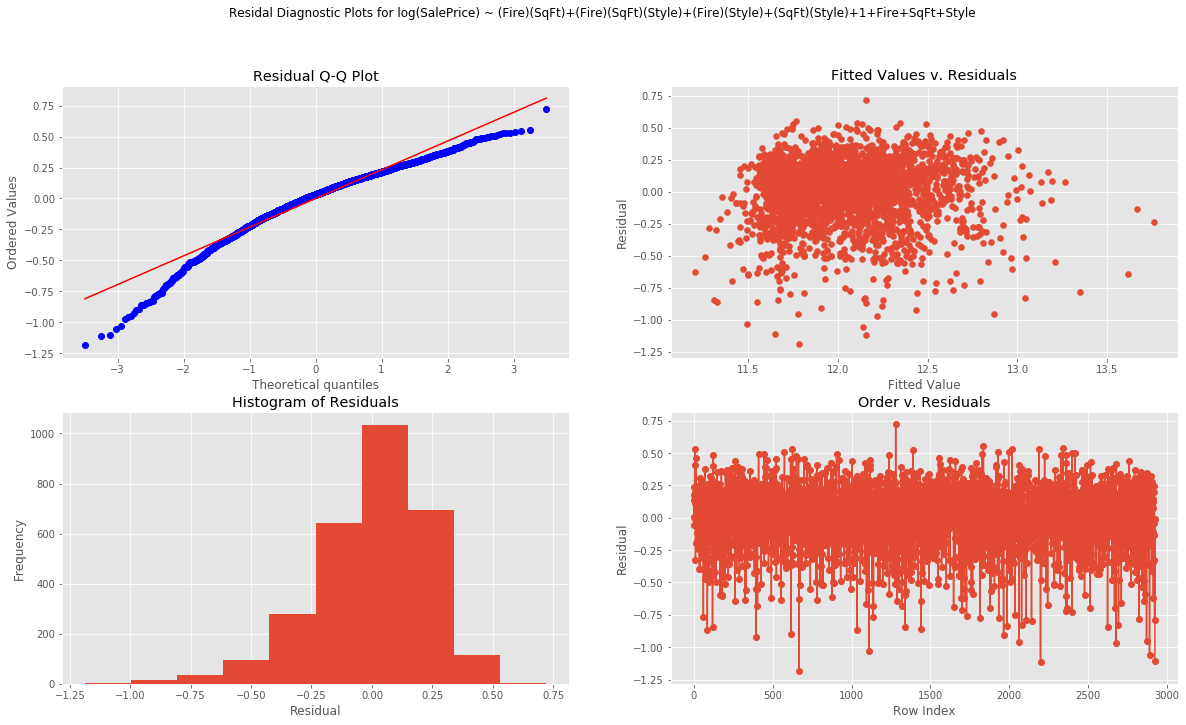

In [30]:
handle_plot(full_model.plot_residual_diagnostics(figsize=(20, 11))[0], name="full_model_resid_diagnostics")

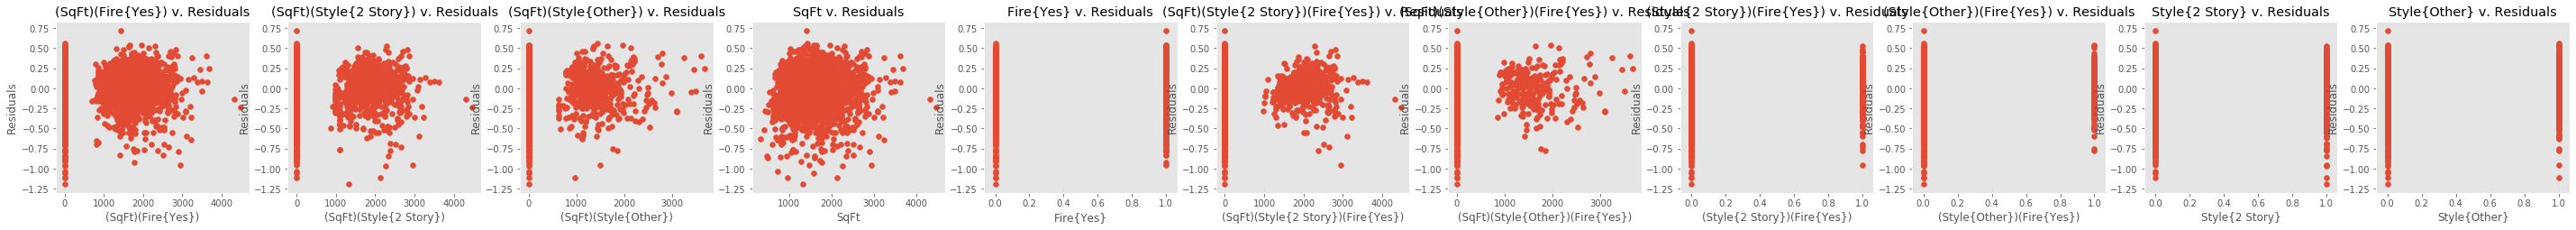

In [31]:
handle_plot(full_model.residual_plots(figsize=(50, 3.5))[0], name="full_model_residual_plots")

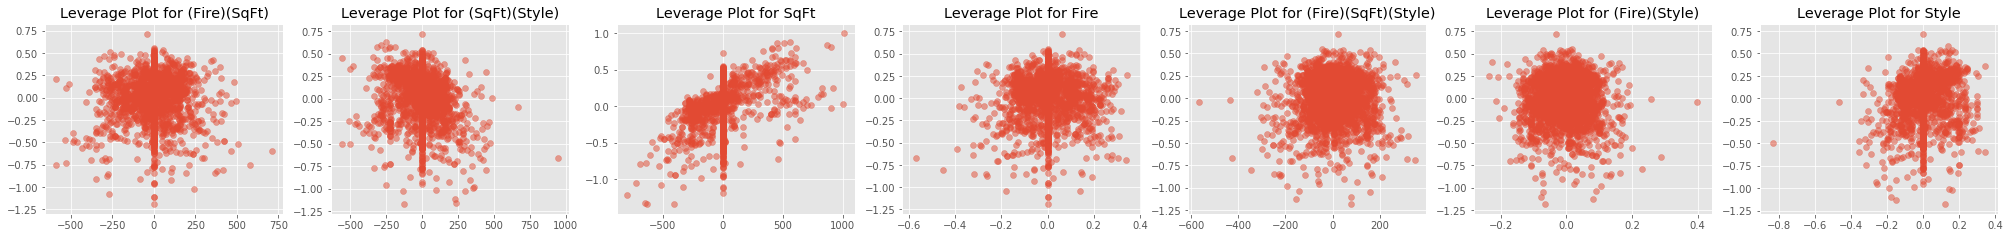

In [32]:
handle_plot(full_model.partial_plots(figsize=(35, 3.5))[0], name="full_model_partial_plots")

In [33]:
full_model.r_squared(adjusted=False)

0.652748378553996

In [34]:
print_dataframe(anova(full_model), name="full_model_anova")

\begin{tabular}{lrllll}
\toprule
{} &    DF & SS Err. & SS Reg. &      F &       p \\
\midrule
Global Test           &    11 &   309.6 &   309.6 &  500.8 &   0.000 \\
- (Fire)(SqFt)        &     1 &   163.8 &   309.4 &  2.477 &  0.1156 \\
- (SqFt)(Style)       &     2 &   169.8 &   303.4 &  54.83 & 4.2e-24 \\
- SqFt                &     1 &   200.3 &   273.0 &  651.3 &  8e-130 \\
- Fire                &     1 &   163.7 &   309.5 &  1.334 &  0.2482 \\
- (Fire)(SqFt)(Style) &     2 &   163.7 &   309.5 & 0.5746 &  0.5630 \\
- (Fire)(Style)       &     2 &   163.7 &   309.5 & 0.3735 &  0.6883 \\
- Style               &     2 &   166.8 &   306.5 &  27.76 & 1.1e-12 \\
Error                 &  2912 &         &         &        &         \\
\bottomrule
\end{tabular}



In [35]:
print_dataframe(anova(full_model, quant_cat_model), name="anova_comparison")

\begin{tabular}{lrllll}
\toprule
{} &    DF & SS Err. & SS Reg. &     F &       p \\
\midrule
Full Model      &    11 &   163.7 &   309.6 &       &         \\
- Reduced Model &     5 &   179.0 &   294.2 & 54.66 & 2.0e-54 \\
Error           &  2912 &         &         &       &         \\
\bottomrule
\end{tabular}



## Section 4

In [36]:
quant_vars = Poly(Cen(Q("SqFt")), 2)
all_terms_model = LinearModel(
    (1 +  C("Style")) * (1 +  C("Fire")) * (1 + quant_vars),
    Log(Q("SalePrice")))
print(all_terms_model)

log(SalePrice) ~ (Fire)(SqFt-E(SqFt))+(Fire)(SqFt-E(SqFt))(Style)+(Fire)(SqFt-E(SqFt)^2)+(Fire)(SqFt-E(SqFt)^2)(Style)+(Fire)(Style)+(SqFt-E(SqFt))(Style)+(SqFt-E(SqFt)^2)(Style)+1+Fire+SqFt-E(SqFt)+SqFt-E(SqFt)^2+Style


In [37]:
results = stepwise(
    full_model=all_terms_model,
    metric_name="BIC",
    forward=True,
    naive=True,
    data=data,
    verbose=False,
)

print(results["metric"])
print(results["best_model"])

BIC | -160.71546601039046
log(SalePrice) ~ (Fire)(SqFt-E(SqFt))+(Fire)(SqFt-E(SqFt)^2)(Style)+(SqFt-E(SqFt))(Style)+1+Fire+SqFt-E(SqFt)+SqFt-E(SqFt)^2+Style


In [38]:
smart_results = stepwise(
    full_model=all_terms_model,
    metric_name="BIC",
    forward=True,
    naive=False,
    data=data,
    verbose=True,
)

print(smart_results["metric"])
print(smart_results["best_model"])

log(SalePrice) ~ 1+Fire
BIC | 2082.9281783014762
Current best potential model

log(SalePrice) ~ 1+SqFt-E(SqFt)
BIC | 859.111823212009
Current best potential model

log(SalePrice) ~ 1+Style
BIC | 2768.4720080568595
Not current best potential

!!! New model found. Now including SqFt-E(SqFt)

log(SalePrice) ~ 1+Fire+SqFt-E(SqFt)
BIC | 563.9593047395649
Current best potential model

log(SalePrice) ~ 1+SqFt-E(SqFt)+SqFt-E(SqFt)^2
BIC | 785.2256100847014
Not current best potential

log(SalePrice) ~ 1+SqFt-E(SqFt)+Style
BIC | 470.6993270862083
Current best potential model

!!! New model found. Now including Style

log(SalePrice) ~ 1+Fire+SqFt-E(SqFt)+Style
BIC | 207.0005388736907
Current best potential model

log(SalePrice) ~ (SqFt-E(SqFt))(Style)+1+SqFt-E(SqFt)+Style
BIC | 175.760588043879
Current best potential model

log(SalePrice) ~ 1+SqFt-E(SqFt)+SqFt-E(SqFt)^2+Style
BIC | 359.5566066132113
Not current best potential

!!! New model found. Now including (SqFt-E(SqFt))(Style)

log(SalePric

In [39]:
terms = (1 +  C("HouseStyle")) * (1 +  C("Fireplace")) * (1 + quant_vars)
print(terms)

(Fireplace)(HouseStyle)+(Fireplace)(HouseStyle)(SqFt-E(SqFt))+(Fireplace)(HouseStyle)(SqFt-E(SqFt)^2)+(Fireplace)(SqFt-E(SqFt))+(Fireplace)(SqFt-E(SqFt)^2)+(HouseStyle)(SqFt-E(SqFt))+(HouseStyle)(SqFt-E(SqFt)^2)+1+Fireplace+HouseStyle+SqFt-E(SqFt)+SqFt-E(SqFt)^2


In [40]:
[(str(term), (C("HouseStyle") * Cen(Q("SqFt"))).contains(term)) for term in (terms - C("HouseStyle") - Cen(Q("SqFt"))).terms]

[('1', False),
 ('(Fireplace)(HouseStyle)', False),
 ('(HouseStyle)(SqFt-E(SqFt)^2)', False),
 ('(Fireplace)(SqFt-E(SqFt)^2)', False),
 ('(Fireplace)(HouseStyle)(SqFt-E(SqFt)^2)', False),
 ('(Fireplace)(HouseStyle)(SqFt-E(SqFt))', False),
 ('(HouseStyle)(SqFt-E(SqFt))', True),
 ('SqFt-E(SqFt)^2', False),
 ('Fireplace', False),
 ('0*SqFt-E(SqFt)', False),
 ('(Fireplace)(SqFt-E(SqFt))', False)]

## Section 5

## Section 6

## Appendix A.1

## Appendix B.1

## Appendix B.2 